# Density Profiles

Here we study the properties of the different desnity profiles that 
are usefull in galaxy formation theory, such as:

1. Plummer Profile
2. Hernquist Profile
3. Isothermal
4. NFW

# Plummer Profile:

The plumer density profile is one of the simplest models which describes
a constant density near the center and falls at large radii. 

$\Phi_P(r) = - \frac{GM}{\sqrt{r^2+a^2}}$

The scale length set the length $a$ in which the mayority of the density is enclosed. Note
that if $a$ is cero the plummer potential would be exactly as the potential of a point mass. 
In the other hand if $a$ goes to infty the potential is rewpresenting a very extended mass source.
In other words the scale length set up the size of the volume in which the mass $M$ is enclosed.

We may use Poisson equation in order to find the the density profile of the Plummer potential. 

$\nabla ^2 \Phi_P(r) = 4 \pi G \rho_P(r)$

$\nabla ^2 \Phi_P(r) = \frac{1}{r^2}\frac{d}{dr} \left (  r^2 \frac{d\Phi_P(r)}{dr} \right)$

$\frac{d\Phi_P(r)}{dr} = -GM \frac{r}{(r^2 + a^2)^{3/2}} $

$\frac{d}{dr} \left(  r^2 \frac{d\Phi_P(r)}{dr} \right) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$4 \pi G \rho_P(r) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$\rho_P(r) = \frac{3M}{4 \pi} \frac{a^2}{(r^2 + a^2)^{5/2}} $

$\rho_P (r) = \frac{3M}{4\pi a^3} (1 + \frac{r^2}{a^2})^{-5/2}$

In order to get the mass we integrate over all the volume of radius $r'$

$M_P(<r) = 4 \pi \int_0^r r'^2\frac{3M}{4\pi a^3} (1 + \frac{r'^2}{a^2})^{-5/2} dr'$

$M_P(<r) = \frac{3M}{a^3} \left( \frac{a^4 r^3 \sqrt{r^2/a^2 + 1}}{3(r^2 + a^2)^2}  \right)$

$M_P(<r) = M \frac{r^3}{(a^2+r^2)^{3/2}}$

Finally a quantity of particular interest is the circular velocity which can be derived as follows:

If a test particle of mass $m$ is orbitating the extended mass $M$ then in order to be in equilibrium
the gravitational force $F_g$ must be equal to the centripetal force.

$F_g = \frac{GmM}{r^2} = ma_c = m \frac{v_c^2}{r}$

$v_c = \sqrt{\frac{GM(<r)}{r}} $

$v_c = \sqrt{GM(\frac{r^2}{(r^2+a^2)^{3/2}})}$

In [2]:
%pylab inline
from astropy import constants
from astropy import units 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
G = constants.G
K = constants.k_B
print G
print K
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
K = K.to(units.Msun * units.kpc**2 / (units.s**2 * units.Kelvin))
print G
print K

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010
  Name   = Boltzmann constant
  Value  = 1.3806488e-23
  Error  = 1.3e-29
  Units  = J / K
  Reference = CODATA 2010
4.51835939627e-39 kpc3 / (s2 solMass)
7.28996615344e-93 kpc2 solMass / (K s2)


In [30]:
M = 1E12 #Msun
M = M*units.Msun
print M
R = np.linspace(0, 25)
R = R*units.kpc

1e+12 solMass


In [7]:
def mass_plummer(a, r, M):
    a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    return Mass

def rho_plummer(a, r, M):
    a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    return rho

def potential_plummer(a, r, M):
    a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    return phi

def vc_plummer(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc

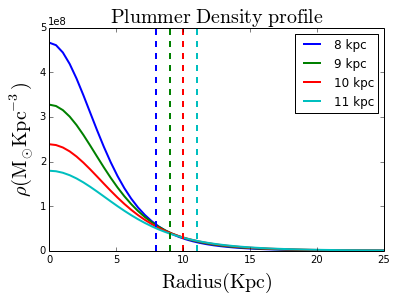

In [9]:
for i in range(8, 12):
    plot(R, rho_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
axvline(8, ls='--', lw=2, c='b')
axvline(9, ls='--', lw=2, c='g')
axvline(10, ls='--', lw=2, c='r')
axvline(11, ls='--', lw=2, c='c')
legend()
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
title('$\mathrm{Plummer\ Density\ profile}$', fontsize=20)
savefig('plummer_density.png', bbox_inches='tight')

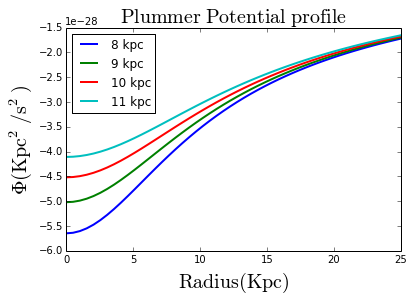

In [10]:
for i in range(8, 12):
    plot(R, potential_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(Kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)
savefig('plummer_phi.png', bbox_inches='tight')

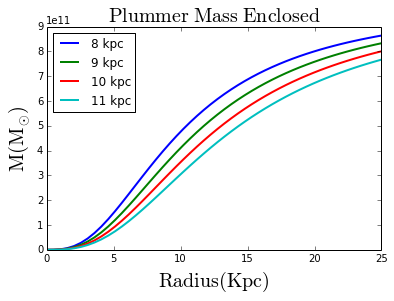

In [11]:
for i in range(8, 12):
    plot(R, mass_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
title('$\mathrm{Plummer\ Mass\ Enclosed}$', fontsize=20)
savefig('plummer_mass.png', bbox_inches='tight')

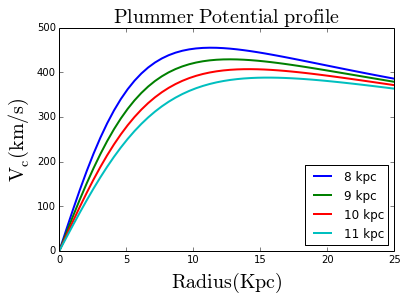

In [12]:
for i in range(8, 12):
    plot(R, vc_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)
savefig('plummer_velocity.png', bbox_inches='tight')

# Hernquist Profile

$\Phi = - \frac{GM}{r+a}$

$\rho_{Hernquist}(r) =  \frac{M}{2\pi} \frac{a}{r(r+a)^3}$

$M_{Hernquist}(<r) = 2aM \int \frac{r}{(r+a)^3}dr $

$M_{Hernquist}(<r) = M \frac{r^2}{(r+a)^2}$

$v_c(r) = GM \frac{r}{(r+a)^2}$



In [8]:
def Potential_Hernquist(a, r, M):
    a = a*units.kpc
    phi = -G*M / (r+a)
    return phi

def Density_Hernquist(a, r, M):
    a = a*units.kpc
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

def Mass_Hernquist(a, r, M):
    a = a*units.kpc
    Mass = M * r**2 / (r+a)**2
    return Mass

def vc_Hernquist(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


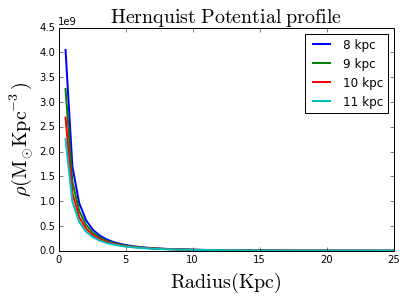

In [17]:
for i in range(8, 12):
    plot(R, Density_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_density.png', bbox_inches='tight')

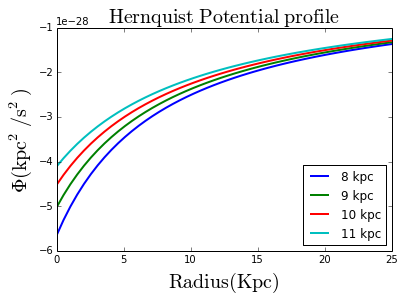

In [18]:
for i in range(8, 12):
    plot(R, Potential_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_potential.png', bbox_inches='tight')

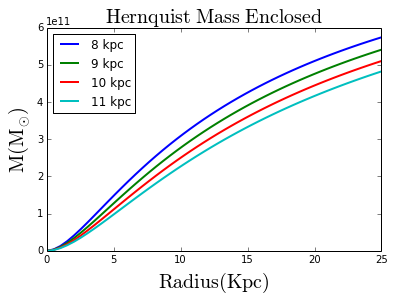

In [19]:
for i in range(8, 12):
    plot(R, Mass_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Mass\ Enclosed}$', fontsize=20)
savefig('hern_mass.png', bbox_inches='tight')

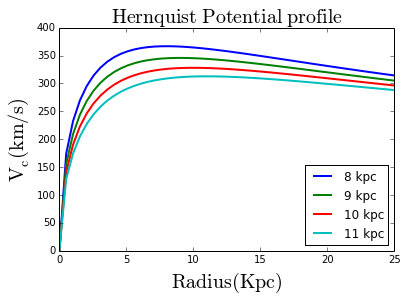

In [20]:
for i in range(8, 12):
    plot(R, vc_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)
savefig('hern_velocity.png', bbox_inches='tight')

# Isothermal profile

In [21]:
def rho_sis(a, v, G, r):
    a = a*units.kpc
    v = v.to(units.kpc / units.s)
    rho = v**2 / (4*np.pi * G*(r**2 + a**2))
    return rho

def mass_sis(v, G, r):
    v = v.to(units.kpc / units.s)
    M = v**2 * r/G
    return M

def phi_sis(v, r):
    v = v.to(units.kpc / units.s)
    phi = v**2 * log(r.value)
    return phi*units.kpc

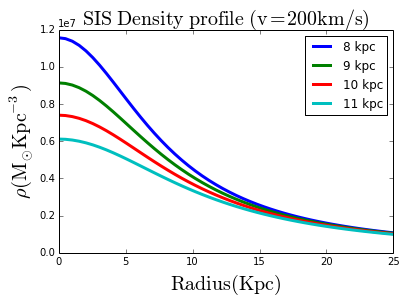

In [22]:
v = 200*units.km / units.s
for i in range(8, 12):
    plot(R, rho_sis(i, v, G, R), lw=3, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{SIS\ Density\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_density.png', bbox_inches='tight')

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


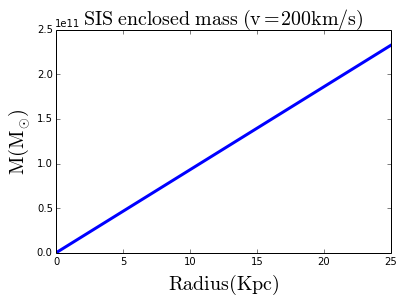

In [23]:
plot(R, mass_sis(v, G, R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{SIS\ enclosed\ mass\ (v=200km/s)}$', fontsize=20)
savefig('sis_mass.png', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


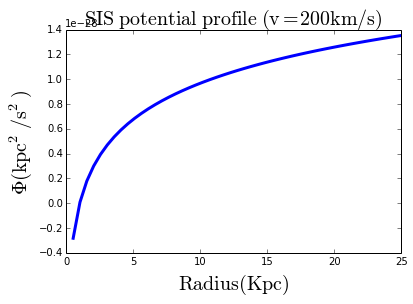

In [24]:
plot(R, phi_sis(v,  R), lw=3)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{SIS\ potential\ profile\ (v=200km/s)}$', fontsize=20)
savefig('sis_phi.png', bbox_inches='tight')

# NFW 

$\rho_{NFW}(r) = \frac{M}{2\pi a^3(r/a) (1 + r/a)^2}$

$M_{NFW}(r) = 2 M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)$

$\Phi_{NFW} = -4\pi G M \frac{ln(1 + r/a)}{r}$


$c = r_{vir}/a$

$c(M_{vir}) = 9.60  \left( \frac{M_{vir}}{10^{12}h^{-1}M_{\odot}} \right)^{-0.075}$ for halos at $z=0$ from Klypin et al 2011

$v_c(r) = \sqrt{\left(\dfrac{M(r)G}{r}\right)} = \sqrt{\left( \dfrac{2 M  \left(  ln(1 + c) - \frac{c}{1 + c} \right)}{r} \right)}$

In [9]:
def rho_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    rho = M / ( 2*np.pi*a**3 *(r/a)*(1 + r/a)**2 )
    return rho

def mass_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    M = 2*M *(log(1 + r/a) - (r/a)/(1 + (r/a)))
    return M

def phi_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    phi = - 4 * np.pi * G * M * log( 1 + r/a) / r
    return phi

def vc_NFW(c, r, M, G):
    H_0 = 70*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    rvir = rvir.to(units.kpc)
    a = rvir / c
    print a
    vc = np.sqrt( ( 2*M*G* (log(1 + r.value/a.value) - (r/a) / (1 + r/a)) )/r )
    vc = vc.to(units.km / units.s)
    return vc

21.1989543127 kpc
18.8435149447 kpc
16.9591634502 kpc
15.4174213184 kpc


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


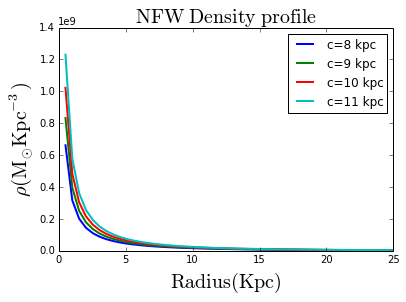

In [22]:
for i in range(8, 12):
    plot(R, rho_NFW(i, R, M, G), lw=2, label = 'c=' +str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Density\ profile}$', fontsize=20)
savefig('NFW_density.png', bbox_inches='tight')

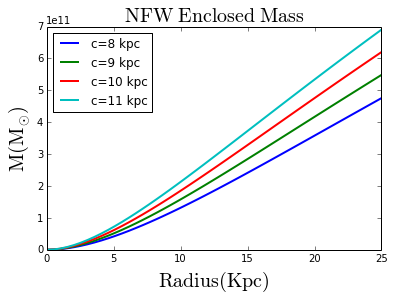

In [31]:
for i in range(8, 12):
    plot(R, mass_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Enclosed\ Mass}$', fontsize=20)
savefig('NFW_mass.png', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


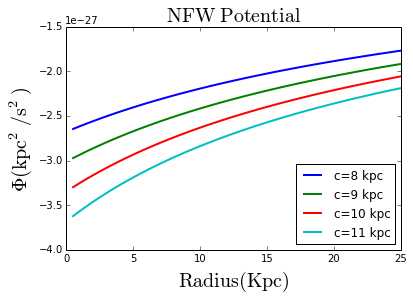

In [24]:
for i in range(8, 12):
    plot(R, phi_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\Phi (kpc^2/s^2)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ Potential}$', fontsize=20)
savefig('NFW_potential.png', bbox_inches='tight')

21.1989543127 kpc
18.8435149447 kpc
16.9591634502 kpc
15.4174213184 kpc


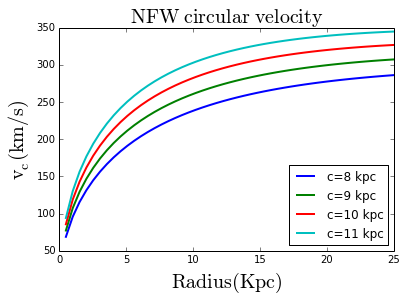

In [25]:
for i in range(8, 12):
    plot(R, vc_NFW(i, R, M, G), lw=2, label = 'c=' + str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{v_c (km/s)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{NFW\ circular\ velocity}$', fontsize=20)
savefig('NFW_vc.png', bbox_inches='tight')

# Miyamoto - Nagai:

In [33]:
def MN_potential(a, b, G, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    phi = - G*M / (np.sqrt(r**2 + ( a + np.sqrt( z**2 + b**2 ))**2 ) )
    return phi.value

def MN_density(a, b, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    rho = (b**2 * M / (4*np.pi)) * (a*r**2 + ( a + 3*(np.sqrt(z**2 + b**2)))*( a + np.sqrt(z**2 + b**2))**2 ) /( ( (r**2 + (a + np.sqrt(z**2 + b**2))**2)**(5./2.) * (z**2 + b**2)**(3./2.)) )
    return rho.value


def MN_vc(a, b, G, M, r, z=0):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    r = r*units.kpc
    vc = r*np.sqrt(G*M / ( (r**2 + (a + b)**2)**(3/2.0) ))
    return vc.value

<matplotlib.contour.QuadContourSet instance at 0x7f79b476b248>

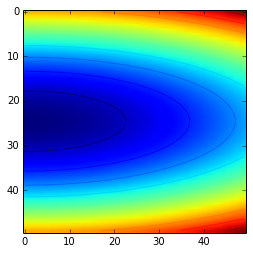

In [52]:
R=20.0
Z=10
r = linspace(0, R)
z = linspace(-Z, Z)
r, z = np.meshgrid(r/R, z/R)
phi = MN_potential(10, 1, G,  M, r, z)
imshow(phi)
contour(phi, 10)

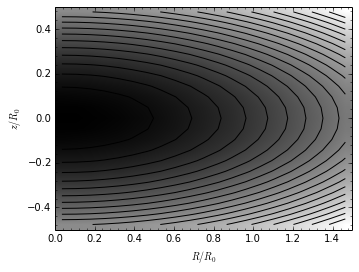

In [16]:
from galpy.potential import MiyamotoNagaiPotential
mp= MiyamotoNagaiPotential(a=10,b=1,normalize=0.6)
mp.plot()

In [69]:
print mp.dens(1, 1)

0.214892411637


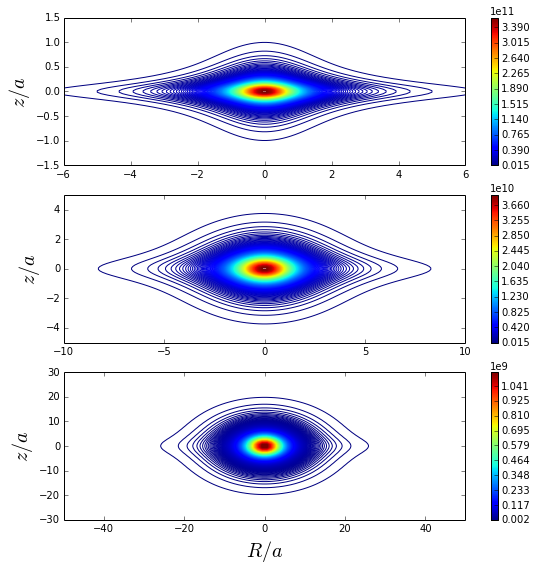

In [116]:
plt.figure(figsize=(9, 9))
R=6.0
Z=1.5 
a = 1.0
#print 0.3*M
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 0.2, M, r, z)
#imshow(rho)
plt.subplot(3, 1, 1)
CS = contour(r, z, rho, 300, lw=10, c='k')
colorbar()
#xlabel("$R/a$", fontsize=20)
ylabel("$z/a$", fontsize=20)

plt.subplot(3, 1, 2)
R= 10.
Z = 5
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 1.0, M, r, z)
CS = contour(r, z, rho, 300, lw=10, c='k')
colorbar()
ylabel("$z/a$", fontsize=20)

plt.subplot(3, 1, 3)
R= 50.
Z = 30.
r = linspace(-R/a, R/a, 100)
z = linspace(-Z, Z, 100)
r, z = np.meshgrid(r/a, z/a)
rho = MN_density(a, 5.0, M, r, z)
CS = contour(r, z, rho, 1000, lw=10, c='k')
colorbar()
xlabel("$R/a$", fontsize=20)
ylabel("$z/a$", fontsize=20)

savefig('MN_density_contours.png', bbox_inches='tight')

#xlim(15, 35)

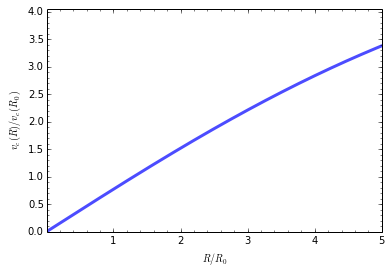

In [107]:
mp.plotRotcurve(lw=3, alpha=0.7)
#mp.plotRotcurve(Rrange=[0.01,1],grid=1001)
r = linspace(0, R)
#plot(r/4.0, MN_vc(10, 1, G, M, r, 0)/MN_vc(10, 1, G, M, 4.0, 0), c='r', alpha=0.7, lw=3)

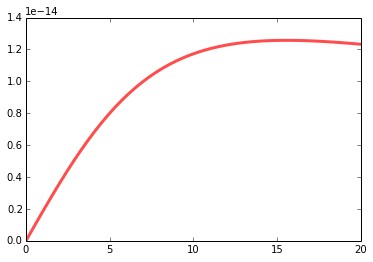

In [126]:
plot(r, MN_vc(10, 1, G, M, r, 0), c='r', alpha=0.7, lw=3)

# Logarithmic Profile

In [133]:
def Log_potential(R, v0, Rc, z, q):
    phi = 0.5 * v0**2 + log(Rc**2 + R**2 +  (z**2 / q**2) )
    return phi

def Log_vc(R, v0, Rc):
    vc = v0*R / (np.sqrt(Rc**2 + R**2))
    return vc

def Log_density(R, v0, Rc, z, G, q):
    rho = ( v0**2 / (4*np.pi*G*q**2) ) * ( ( (2*q**2 + 1)*Rc**2 + R**2 + (2 - q**2)*z**2 ) / (Rc**2 + R**2 + ( z**2 / q**2) )**2  )
    return rho

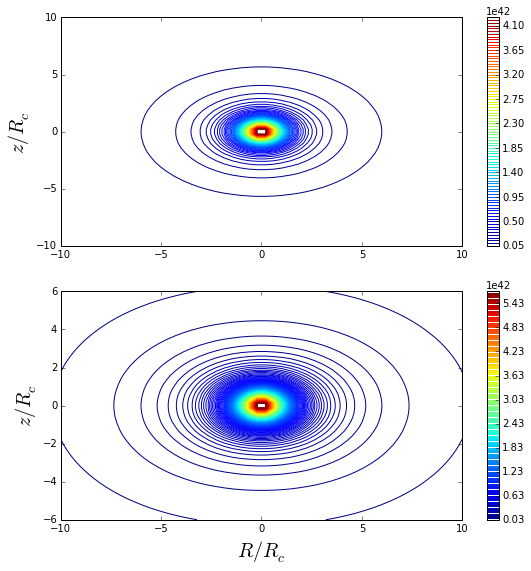

In [134]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 1, 1)

Rc = 1
z = linspace(-10, 10)
R = linspace(-10, 10)
R, z = meshgrid(R, z)
v0 = 300
rho = Log_density(R, v0, Rc, z, G.value, 0.95)
CS = contour(R, z, rho, 100, lw=10, c='k')
colorbar()
ylabel("$z/R_c$", fontsize=20)

plt.subplot(2, 1, 2)

z = linspace(-6, 6)
R = linspace(-10, 10)
R, z = meshgrid(R, z)
v0 = 300
rho = Log_density(R, v0, Rc, z, G.value, 0.7)
CS = contour(R, z, rho, 200, lw=10, c='k')
colorbar()
xlabel("$R/R_c$", fontsize=20)
ylabel("$z/R_c$", fontsize=20)

# Logarithmic profile (Law, Johnston & Majewski)

In [19]:
def Log_LJM_potential(r, v0, d, z, q):
    phi =  v0**2 + log(r**2 +  (z**2 / q**2)  + d**2)
    return phi

def Log_LJM_vc(r, v0, d):
    vc = np.sqrt(2) * v0*r / (np.sqrt(d**2 + r**2))
    return vc

# logarithmic Profile (Law & Majewski )

In [22]:
def Log_LM_potential(x, y, z, r, phi, q, q1, q2):
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) + (np.sin(phi)**2 / q1**2))
    c3 = 2 * np.sin(phi) * np.cos(phi) * ( 1/q1**2 - 1/q2**2)
    Phi = v0**2 * log( (c1 * x**2) + (c2*y**2) + (c3*x*y) + ( r**2 * (z/q)**2) )
    return Phi

# Virial Radius and Virial Mass

$\rho_{vir} = \frac{3M_{vir}}{4 \pi r_{vir}^3} = \Delta_{vir} \Omega_m \rho_{crit} $

$r_{vir} = \left( \frac{3M_{vir}}{4 \pi \Delta_{vir} \Omega_m \rho_{crit} } \right )^{1/3}$

$\Delta_{vir}=360$ from top hat model(Klypin et al 2011: http://arxiv.org/pdf/1002.3660v4.pdf)
at low z.

$\Omega_m = 0.27$

$\rho_{crit} = \frac{3H^2}{8\pi G}$

$H^2 = H_0^2 (\Omega_r a^{-4} + \Omega_m a^{-3} + \Omega_k a^{-2} + \Omega_{\Lambda})$

How you find r_vir?

In [25]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

In [26]:
H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
print H_0 

H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))

print H_0, G

70.0 km / (Mpc s)
2.26854550263e-18 1 / s 4.51835939627e-39 kpc3 / (s2 solMass)


In [27]:
pcrit = rho_crit(G, 0, 0.27, H_0)
print pcrit

135.955134016 solMass / kpc3


In [28]:
def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [13]:
rvirt = rvir(1e12, 0)
print rvirt

262.391545659 kpc


# $\Delta_{vir}$

 This comes up from the solutions for the 
 top hat model and can be expressed as:
 
 $\Delta_{vir} = 18 \pi^2 + 82x - 32x^2$
 where $x = \Omega_m(z) - 1$

In [14]:
def Dvir(z):
    H = 70
    Omega0 = 0.27
    Omegaz = Omega_z(z, Omega0, H)
    x = Omegaz - 1
    Deltavir =  ( (18*np.pi**2) +  (82*x) - 39*x**2 ) / Omegaz
    return Deltavir

In [15]:
Z = linspace(0, 10, 100)
Dv = Dvir(Z)

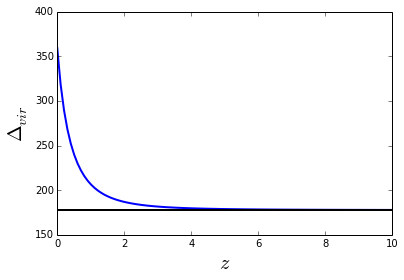

In [16]:
plot(Z, Dv, lw=2)
axhline(18*np.pi**2, lw=2, c='k')
xlabel('$z$', fontsize=20)
ylabel('$\Delta_{vir}$', fontsize=20)
savefig('deltavir.png', bbox_inches = 'tight')

In [ ]:

# From rvir to r200